#Testing Gait Cycle Extraction Method

The purpose of this notebook is to test our method for extracting gait cycles to determine how effective it is.

In [5]:
%matplotlib inline
%precision 3
import numpy as np
import scipy
import ReadCsvs as rc
import thinkstats2
import thinkplot
import GaitCycleFunc as gcf

In [6]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

###Define Function for Gait Cycle Extraction

[[332, 8736.415731696261], [721, 8788.7094522528114], [1118, 8479.8286950888378]] [1.855, 3.8000000000000003, 5.7850000000000001] [77.903510640599535, 73.438836340597888, 71.329663266798548]


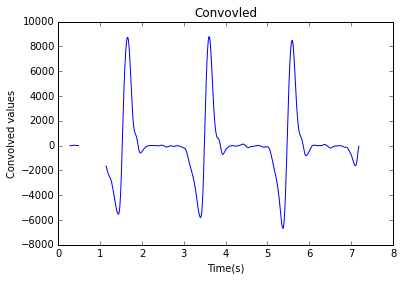

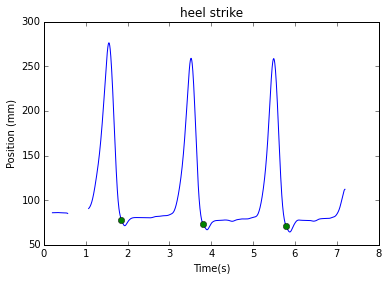

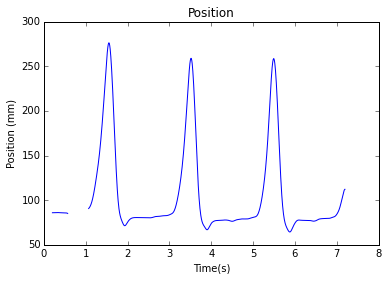

In [42]:
data=[AFO, PPAFO, Shoes]

pnum=7
trial=4
fw='Shoes'
plot=False
plot2=True
plane='z'

strike_charac, strike_loc = gcf.HeelStrike(fw, data, pnum, trial, 'L_HEEL', True)

In [44]:
def CycleExtract(fw, data, pnum, trial, plane, marker, plot, plot2):
    
    strike_charac, strike_loc = gcf.HeelStrike(fw, data, pnum, trial,marker, plot)
    num_cycles=len(strike_charac)

    dataframe=AFO[pnum].GetTrial(trial).GetData(plane)

    cycle_set=[]

    for i in range(num_cycles-1):
    
        start_rowindex=strike_charac[i][0]+40
        end_rowindex=strike_charac[i+1][0]+50
    
        cycle=dataframe[start_rowindex : end_rowindex]
        index=range(start_rowindex, end_rowindex, 1)
    
        cycle_set.append((index, cycle))
    
    if plot2==True:
        for j in range(len(cycle_set)):
    
            index, cycle=cycle_set[j]
             
            thinkplot.Plot(dataframe['R_HEEL'], color='blue', label='Right full set')
            thinkplot.Plot(index, cycle['R_HEEL'], color='red', label='Right cycle set')  
            thinkplot.Show(legend=True)
            
            thinkplot.Plot(dataframe['L_HEEL'], color='blue', label='Left full set')
            thinkplot.Plot(index, cycle['L_HEEL'], color='red', label='Left cycle set')  
            thinkplot.Show(legend=True)
            
    return cycle_set

###Test Function Definition

In [46]:
data=[AFO, PPAFO, Shoes]

pnum=11
trial=7
fw='AFO'
plot=False
plot2=False
plane='z'

print "Using L_HEEL marker"
cycle_set_L=CycleExtract(fw, data, pnum, trial, plane, 'L_HEEL', plot, plot2)
print "Using R_HEEL marker"
cycle_set_R=gcf.CycleExtract(fw, data, pnum, trial, plane, 'R_HEEL', plot, plot2)

Using L_HEEL marker
[[189, 5932.3407328905296], [416, 6312.136369546417], [651, 6481.8799559107956], [880, 6960.7585683829548]] [1.1400000000000001, 2.2749999999999999, 3.4500000000000002, 4.5949999999999998] [89.396207006621665, 79.411561267053827, 78.379540884584344, 68.710656415678827]
Using R_HEEL marker
[[308, 8733.8646621839725], [538, 9107.0646385414311], [769, 9312.8446737820104]] [1.7350000000000001, 2.8850000000000002, 4.04] [75.800829078702762, 77.002655236708108, 70.427075205256713]


###Test Symmetry Based on Gait Cycles

[[308, 8733.8646621839725], [538, 9107.0646385414311], [769, 9312.8446737820104]] [1.7350000000000001, 2.8850000000000002, 4.04] [75.800829078702762, 77.002655236708108, 70.427075205256713]


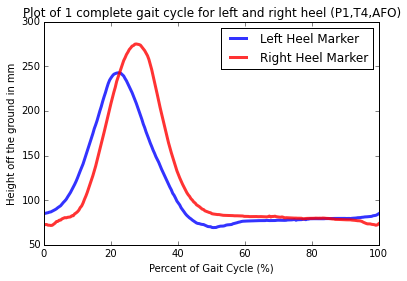

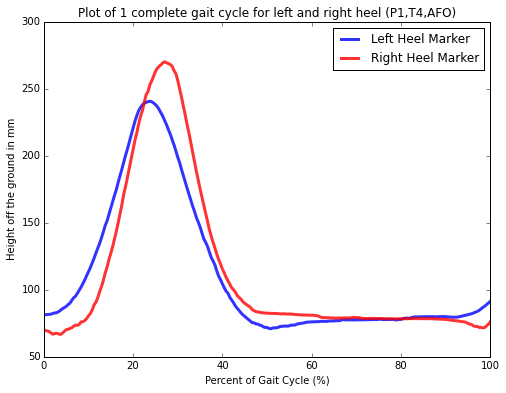

In [56]:
pnum=11
trial=7
fw='AFO'
plot=False
plot2=False
plane='z'

cycle_set=gcf.CycleExtract(fw, data, pnum, trial, plane, 'R_HEEL', plot, plot2)

for i in range(len(cycle_set)):
    index, cycle=cycle_set[i]
    lheeldata=cycle['L_HEEL'] 
    rheeldata=cycle['R_HEEL'] 
    percent=np.linspace(0,100, len(index))


    thinkplot.Plot(percent, lheeldata, label='Left Heel Marker', color='blue')
    thinkplot.Plot(percent[::-1], rheeldata, label='Right Heel Marker', color='red')
    thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (P1,T4,AFO)')
    
    

[[189, 5932.3407328905296], [416, 6312.136369546417], [651, 6481.8799559107956], [880, 6960.7585683829548]] [1.1400000000000001, 2.2749999999999999, 3.4500000000000002, 4.5949999999999998] [89.396207006621665, 79.411561267053827, 78.379540884584344, 68.710656415678827]
[[308, 8733.8646621839725], [538, 9107.0646385414311], [769, 9312.8446737820104]] [1.7350000000000001, 2.8850000000000002, 4.04] [75.800829078702762, 77.002655236708108, 70.427075205256713]


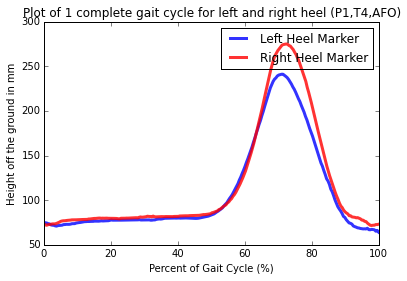

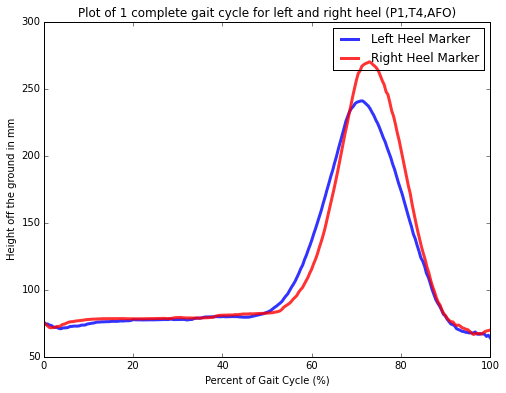

In [55]:
pnum=11
trial=7
fw='AFO'
plot=False
plot2=False
plane='z'

cycle_set_L=gcf.CycleExtract(fw, data, pnum, trial, plane, 'L_HEEL', plot, plot2)
cycle_set_R=gcf.CycleExtract(fw, data, pnum, trial, plane, 'R_HEEL', plot, plot2)

for i in range(len(cycle_set_L)):
    index_L, cycle_L=cycle_set_L[i]
    lheeldata=cycle_L['L_HEEL'] 
    percent_L=np.linspace(0,100, len(index_L))

for i in range(len(cycle_set_R)):
    index_R, cycle_R=cycle_set_R[i]
    rheeldata=cycle_R['R_HEEL'] 
    percent_R=np.linspace(0,100, len(index_R))

    thinkplot.Plot(percent_L, lheeldata, label='Left Heel Marker', color='blue')
    thinkplot.Plot(percent_R, rheeldata, label='Right Heel Marker', color='red')
    thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (P1,T4,AFO)')
    
    